# IMPORTING THE LIBRARIES AND THE DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted,diabetesMed
0,2278392.0,8222157.0,Caucasian,Female,79.0,63.0,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,NO,No
1,2735964.0,2359485.0,Caucasian,Female,66.0,119.0,6.0,25.0,7.0,3.0,...,No,Steady,No,No,No,No,No,No,NO,Yes
2,2968386.0,8568180.0,Caucasian,Female,60.0,70.0,6.0,25.0,7.0,2.0,...,No,Steady,No,No,No,No,No,No,NO,Yes
3,3108096.0,5832918.0,Caucasian,Female,19.0,79.0,6.0,25.0,7.0,1.0,...,No,Steady,No,No,No,No,No,No,31,Yes
4,4140282.0,7443135.0,Caucasian,Female,63.0,20.0,6.0,25.0,7.0,2.0,...,No,Steady,No,No,No,No,No,No,NO,Yes


In [2]:
data.shape

(101767, 50)

Knowing the Shape(The number of rows and columns) of data.

# KNOWING HOW MANY COLUMNS EXIST IN OUR DATASET

In [3]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted', 'diabetesMed'],
      dtype='object')

It tells us about how many Columns exist in our data set.

# TO KNOW WHETHER NULL VALUES EXIST IN OUR DATASET OR NOT

In [4]:
data.isnull().sum()

encounter_id                1
patient_nbr                 1
race                        1
gender                      1
age                         1
weight                      1
admission_type_id           1
discharge_disposition_id    1
admission_source_id         1
time_in_hospital            1
payer_code                  1
medical_specialty           1
num_lab_procedures          1
num_procedures              1
num_medications             1
number_outpatient           1
number_emergency            1
number_inpatient            1
diag_1                      2
diag_2                      1
diag_3                      1
number_diagnoses            1
max_glu_serum               1
A1Cresult                   1
metformin                   1
repaglinide                 1
nateglinide                 1
chlorpropamide              1
glimepiride                 1
acetohexamide               1
glipizide                   1
glyburide                   1
tolbutamide                 1
pioglitazo

To find whether null values exist in our dataset or not.

# DROPPING ATTRIBUTES WHICH ARE IRRELEVANT

In [5]:
data.drop(['payer_code','encounter_id','medical_specialty','patient_nbr','admission_source_id','diabetesMed','readmitted'],axis=1, inplace=True)
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,Caucasian,Female,79.0,63.0,6.0,25.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,66.0,119.0,6.0,25.0,3.0,34.0,0.0,4.0,...,No,No,No,Steady,No,No,No,No,No,No
2,Caucasian,Female,60.0,70.0,6.0,25.0,2.0,45.0,0.0,5.0,...,No,No,No,Steady,No,No,No,No,No,No
3,Caucasian,Female,19.0,79.0,6.0,25.0,1.0,54.0,0.0,8.0,...,No,No,No,Steady,No,No,No,No,No,No
4,Caucasian,Female,63.0,20.0,6.0,25.0,2.0,11.0,0.0,11.0,...,No,No,No,Steady,No,No,No,No,No,No


Dropping 'payer_code','encounter_id','medical_specialty','patient_nbr','admission_source_id' which are not useful for further analysis.

# FILLING NULL VALUES IN DATA USING FORWARD FILL

In [6]:
data.fillna(method='ffill', inplace=True)
data.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

# REPLACING '?','Unknown/In45alid' WITH NAN AND FILLING IT USING FORWARD FILL and BACKWARD FILL

In [7]:
data['race']=data['race'].replace('?','nan')
data['gender']=data['gender'].replace('Unknown/In454alid', np.nan)
data['diag_1']=data['diag_1'].replace('?', np.nan)
data['diag_2']=data['diag_2'].replace('?', np.nan)
data['diag_3']=data['diag_3'].replace('?', np.nan)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
data.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

# PLOTTING 'RACE' VARIABLE

Text(0.5,1,'Plotting race variable')

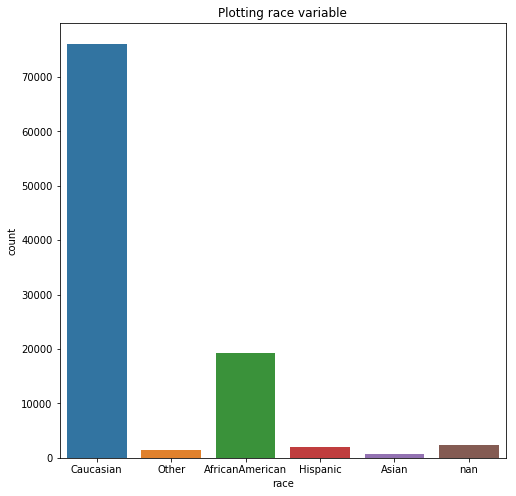

In [8]:
plt.figure(figsize=(8,8))
sns.countplot(x='race', data=data)
plt.title('Plotting race variable')

To find the count of different races present in 'RACE' variable.

# PLOTTING 'GENDER' USING COUNTPLOT

Text(0.5,1,'Plotting gender variable')

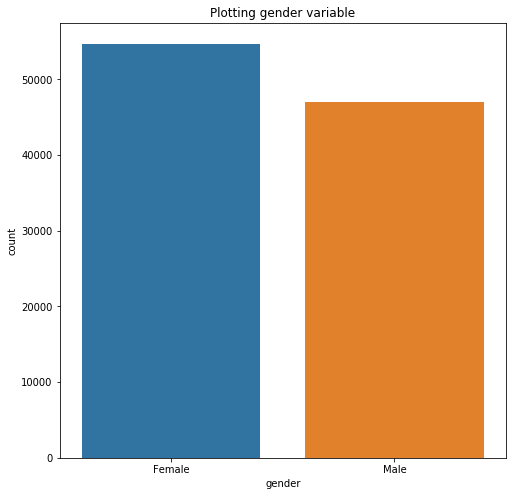

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(x='gender', data=data)
plt.title('Plotting gender variable')

To find the number of genders present in 'GENDER' column using countplot.

# PLOTTING 'AGE' VARIABLE

Text(0.5,1,'Plotting age variable')

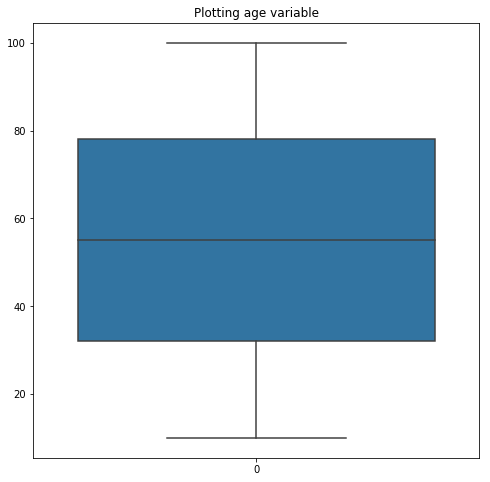

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['age'])
plt.title('Plotting age variable')

To Know how many outliers are present in the 'AGE' column using boxplot.

# PLOTTING 'WEIGHT' VARIABLE

Text(0.5,1,'Plotting weight variable')

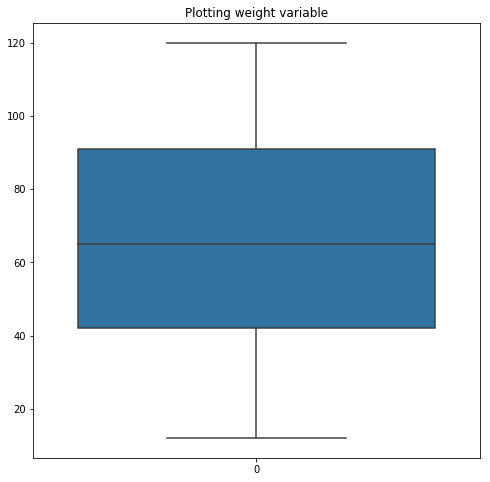

In [11]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['weight'])
plt.title('Plotting weight variable')

To Know how many outliers are present in the 'WEIGHT' column using boxplot.

# PLOTTING 'ADMISSION_TYPE_ID' VARIABLE

Text(0.5,1,'Plotting admission_type_id variable')

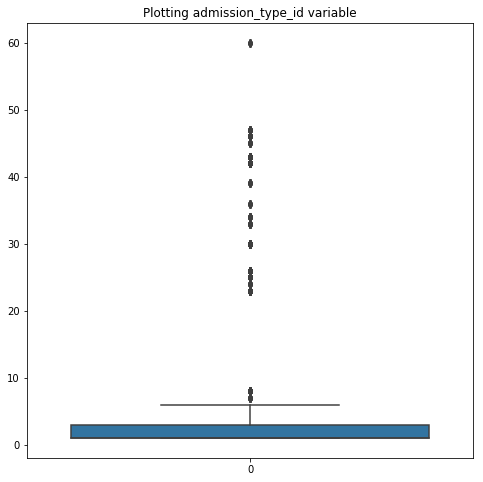

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['admission_type_id'])
plt.title('Plotting admission_type_id variable')

To Know how many outliers are present in the 'admission_type_id' column using boxplot.

# PLOTTING 'DISCHARGE_DISPOSITION_ID' VARIABLE

Text(0.5,1,'Plotting discharge_disposition_id variable')

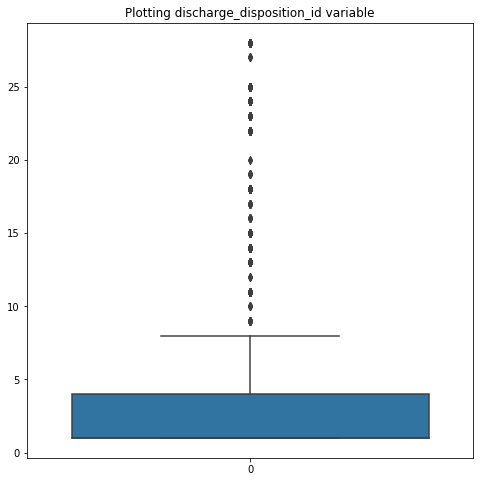

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['discharge_disposition_id'])
plt.title('Plotting discharge_disposition_id variable')

To Know how many outliers are present in the 'discharge_disposition_id' column using boxplot.

# PLOTTING 'TIME_IN_HOSPITAL' VARIABLE

Text(0.5,1,'Plotting time_in_hospital variable')

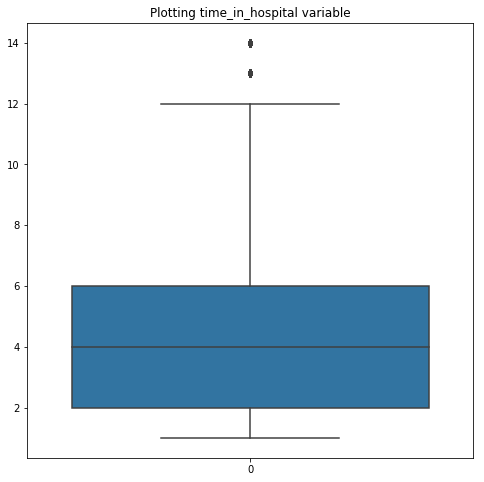

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['time_in_hospital'])
plt.title('Plotting time_in_hospital variable')

To Know how many outliers are present in the 'time_in_hospital' column using boxplot.

# PLOTTING 'NUM_LAB_PROCEDURES' VARIABLE

Text(0.5,1,'Plotting num_lab_procedures variable')

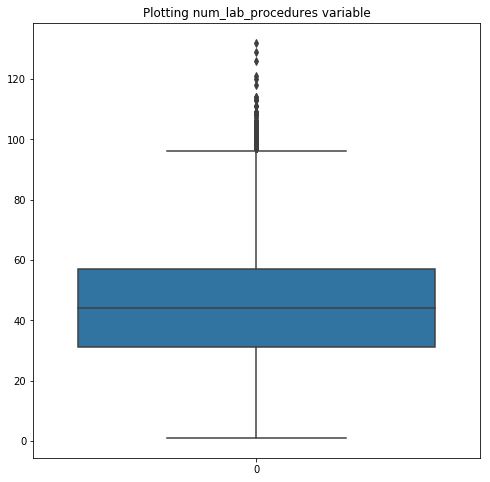

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['num_lab_procedures'])
plt.title('Plotting num_lab_procedures variable')

To Know how many outliers are present in the 'num_lab_procedures' column using boxplot.

# PLOTTING 'NUM_PROCEDURES' VARIABLE

Text(0.5,1,'plotting num_procedures')

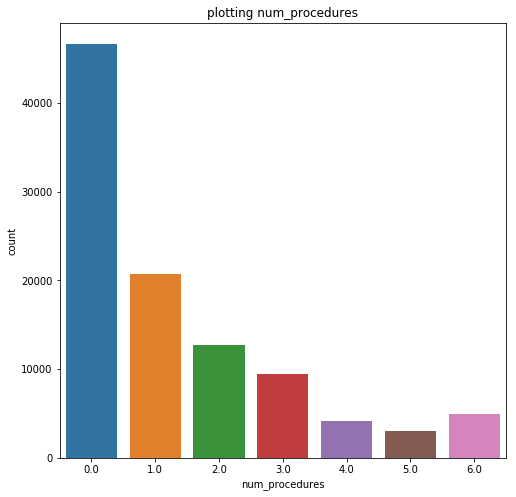

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(x='num_procedures', data=data)
plt.title('plotting num_procedures')

Plotting 'num_procedures' using barplot.

# PLOTTING 'NUM_MEDICATIONS' VARIABLE

Text(0.5,1,'plotting num_medications variable')

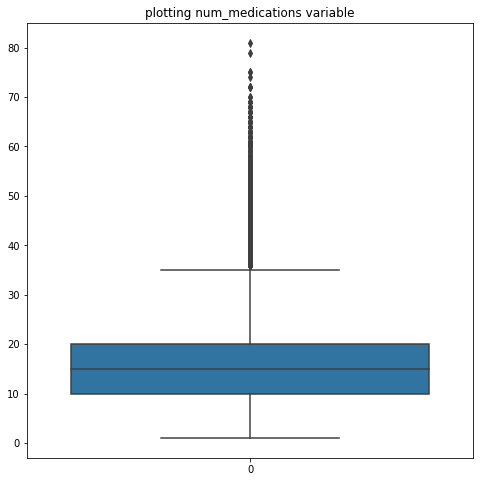

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['num_medications'])
plt.title('plotting num_medications variable')

To Know how many outliers are present in the 'num_medications' column using boxplot.

# PLOTTING 'NUMBER_OUTPATIENT' VARIABLE

Text(0.5,1,'Plotting number_outpatient variable')

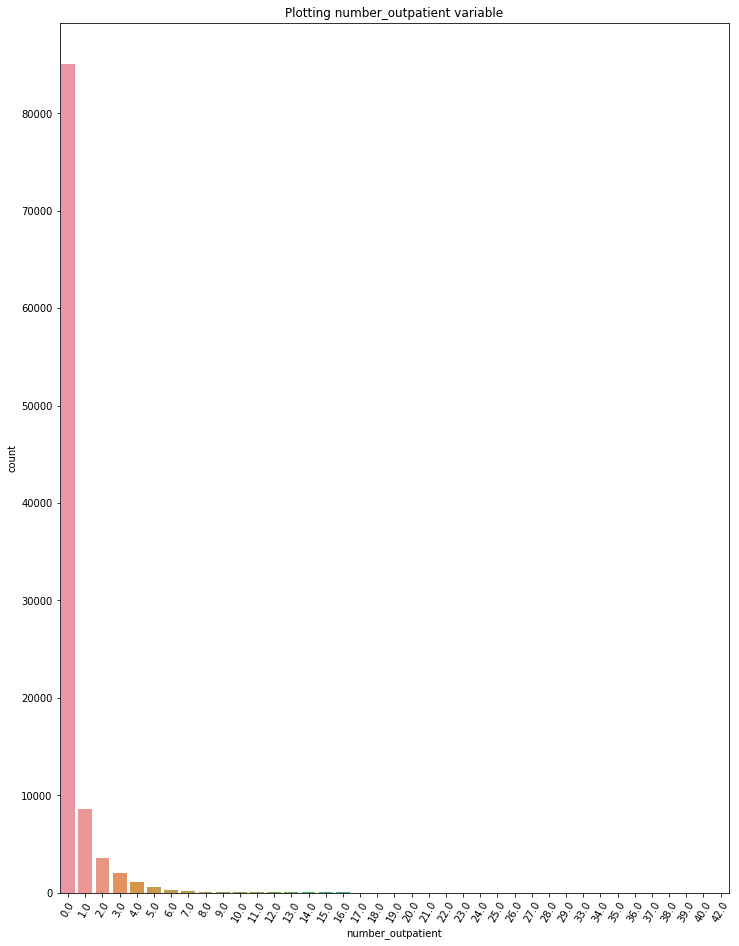

In [18]:
plt.figure(figsize=(12,16))
sns.countplot(x='number_outpatient', data=data)
plt.xticks(rotation=60)
plt.title('Plotting number_outpatient variable')

Plotting 'number_outpatient' variable using countplot.

# PLOTTING 'NUMBER_EMERGENCY' VARIABLE

Text(0.5,1,'Plotting number_emergency variable')

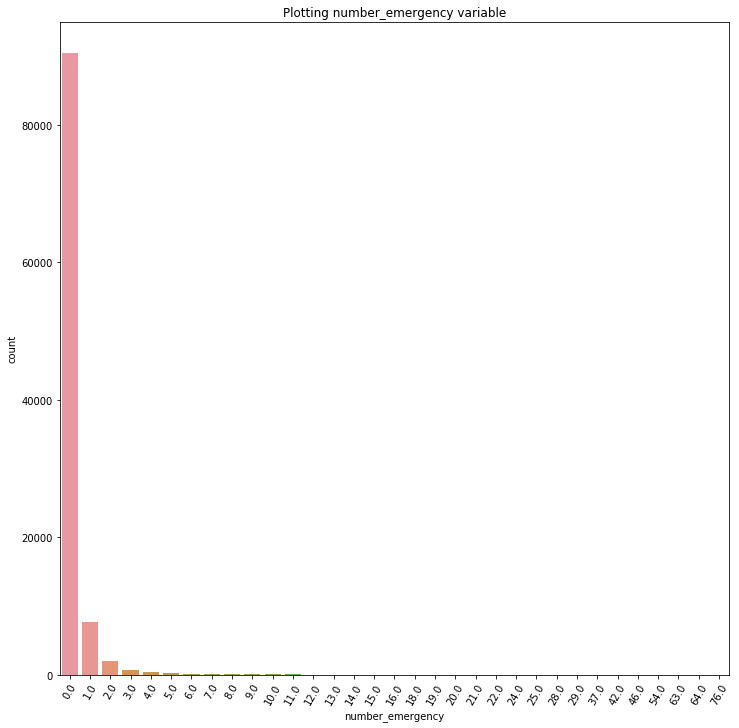

In [19]:
plt.figure(figsize=(12,12))
sns.countplot(x='number_emergency', data=data)
plt.xticks(rotation=60)
plt.title('Plotting number_emergency variable')

Plotting 'number_emergency' variable using countplot.

# PLOTTING 'NUMBER_INPATIENT' VARIABLE

Text(0.5,1,'Plotting number_inpatient variable')

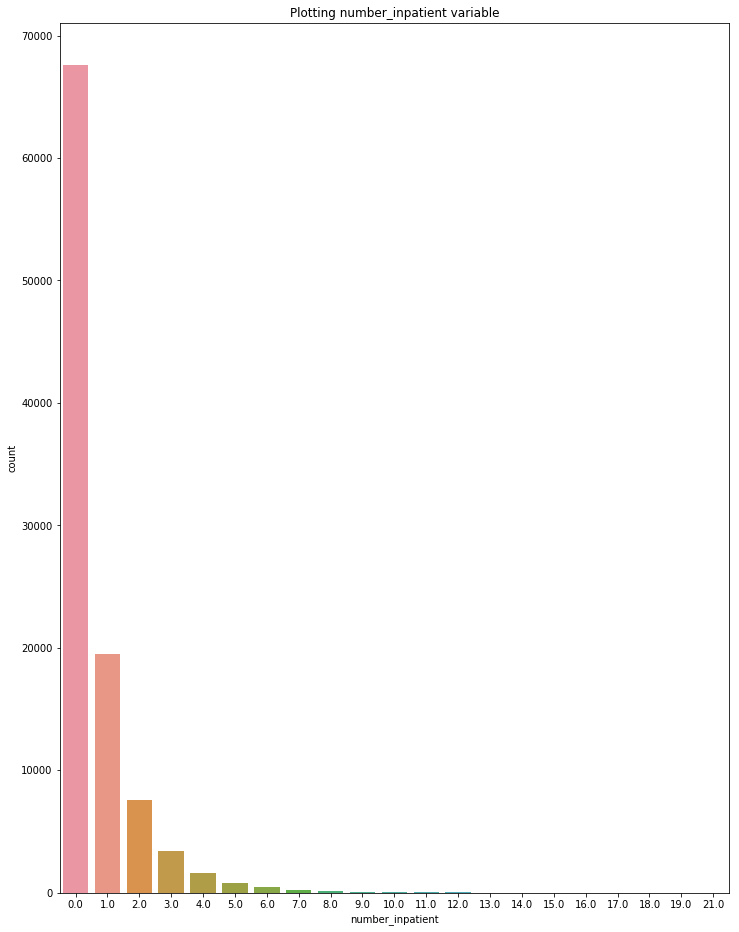

In [20]:
plt.figure(figsize=(12,16))
sns.countplot(x='number_inpatient', data=data)
plt.title('Plotting number_inpatient variable')

Plotting 'number_inpatient' variable using countplot.

# PLOTTING 'DIAG_1' VARIABLE

Text(0.5,1,'plotting diag_1 variable')

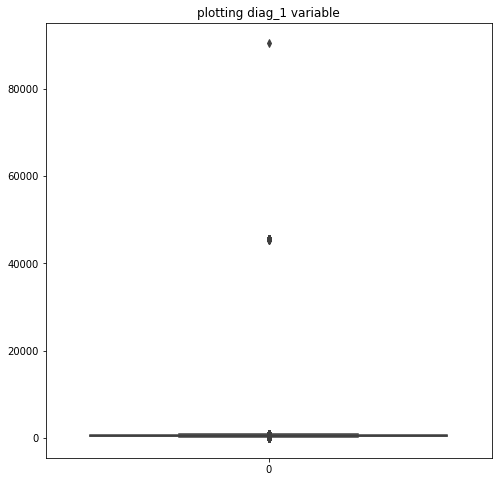

In [21]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['diag_1'])
plt.title('plotting diag_1 variable')

To Know how many outliers are present in the 'diag_1' column using boxplot.

# PLOTTING 'DIAG_2' VARIABLE

Text(0.5,1,'plotting diag_2 variable')

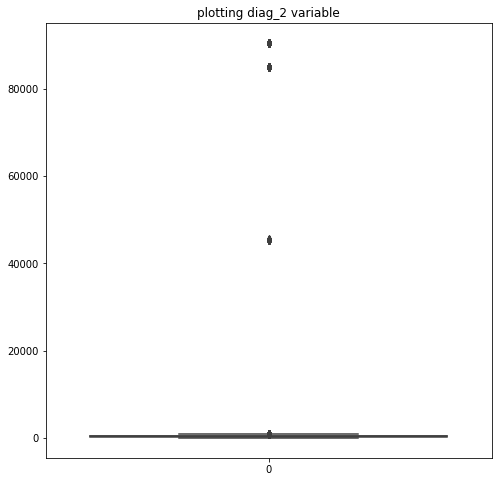

In [22]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['diag_2'])
plt.title('plotting diag_2 variable')

To Know how many outliers are present in the 'diag_2' column using boxplot.

# PLOTTING 'DIAG_3' VARIABLE

Text(0.5,1,'Plooting diag_3 variable')

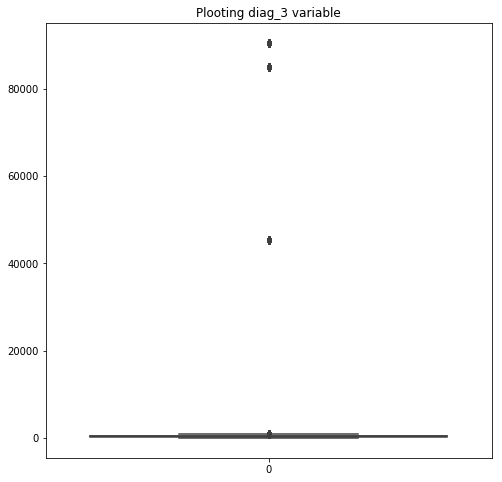

In [23]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data['diag_3'])
plt.title('Plooting diag_3 variable')

To Know how many outliers are present in the 'diag_3' column using boxplot.

# PLOTTING 'NUMBER_DIAGNOSES' VARIABLE

Text(0.5,1,'Plotting number_diagnoses variable')

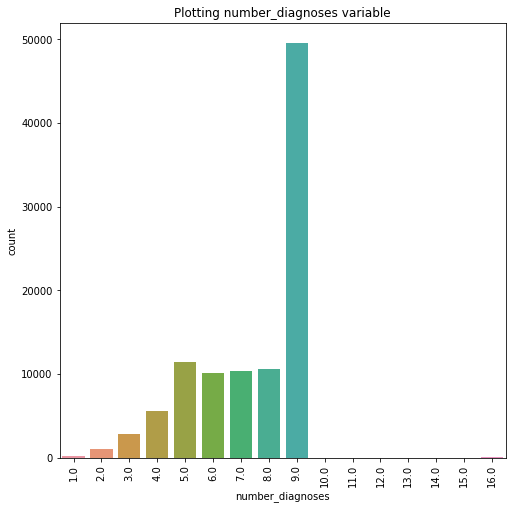

In [24]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(x='number_diagnoses', data=data)
plt.title('Plotting number_diagnoses variable')

Plotting 'number_diagnoses' variable using countplot.

# PLOTTING 'MAX_GLU_SERUM' VARIABLE

Text(0.5,1,'Plotting max_glu_serum variable')

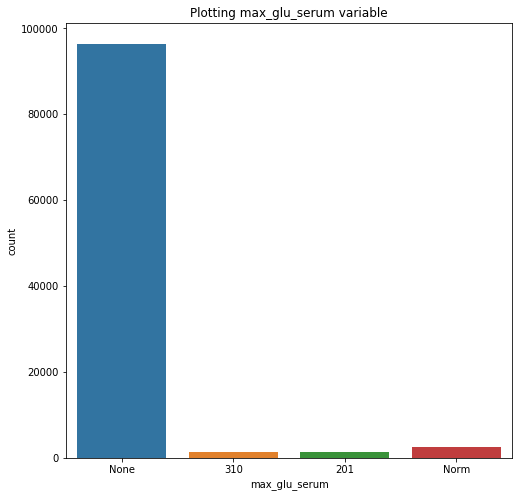

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x='max_glu_serum', data=data)
plt.title('Plotting max_glu_serum variable')

Plotting 'max_glu_serum' variable using countplot.

# PLOTTING 'A1CRESULT' VARIABLE

Text(0.5,1,'Plotting A1Cresult variable')

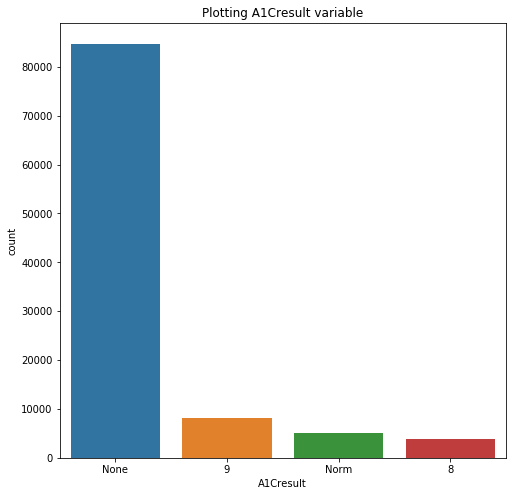

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(x='A1Cresult', data=data)
plt.title('Plotting A1Cresult variable')

Plotting 'A1Cresult' variable using countplot.

# PLOTTING 'METFORMIN' VARIABLE

Text(0.5,1,'Plotting metformin variable')

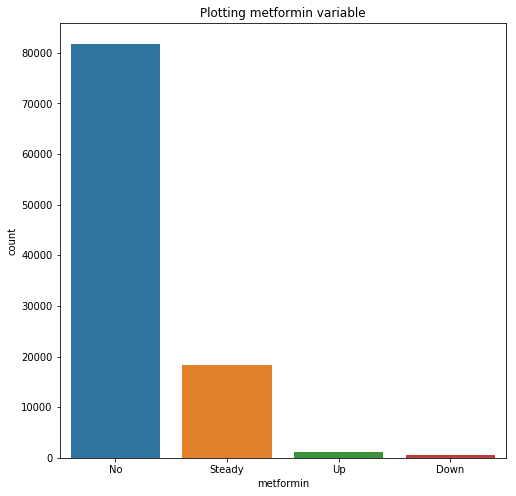

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(x='metformin', data=data)
plt.title('Plotting metformin variable')

Plotting 'metformin' variable using countplot.

# PLOTTING 'REPAGLINIDE' VARIABLE

Text(0.5,1,'Plotting repaglinide variable')

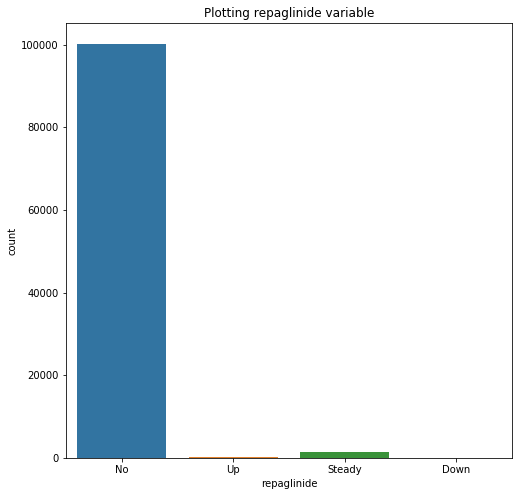

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(x='repaglinide', data=data)
plt.title('Plotting repaglinide variable')

Plotting 'repaglinide' variable using countplot.

# PLOTTING 'NATEGLINIDE' VARIABLE

Text(0.5,1,'Plotting nateglinide variable')

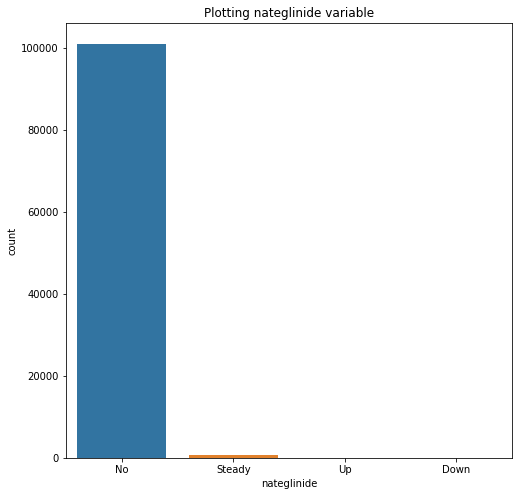

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(x='nateglinide', data=data)
plt.title('Plotting nateglinide variable')

Plotting 'nateglinide' variable using countplot.

# PLOTTING 'CHLORPROPAMIDE' VARIABLE 

Text(0.5,1,'Plotting chlorpropamide variable')

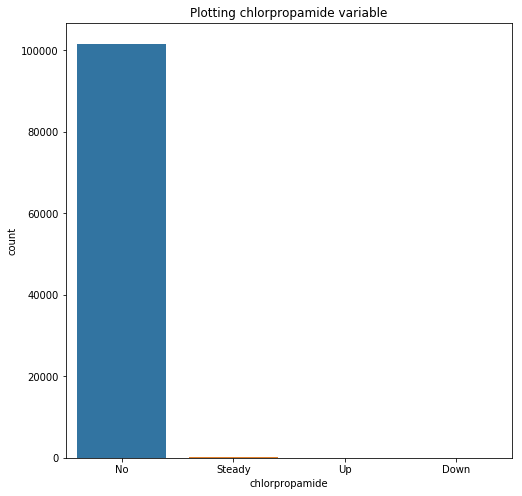

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(x='chlorpropamide', data=data)
plt.title('Plotting chlorpropamide variable')

Plotting 'chlorpropamide' variable using countplot.

# PLOTTING 'GLIMEPIRIDE' VARIBALE

Text(0.5,1,'Plotting glimepiride variable')

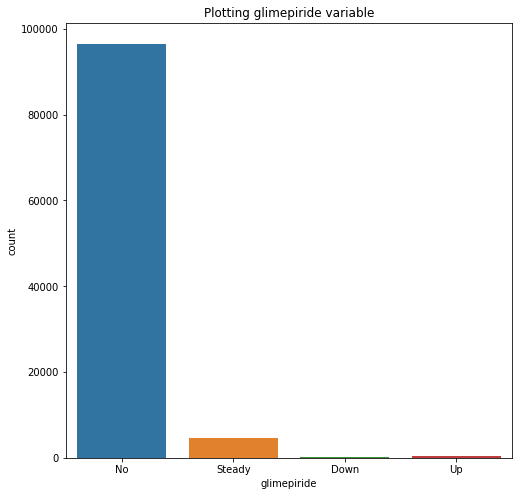

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(x='glimepiride', data=data)
plt.title('Plotting glimepiride variable')

Plotting 'glimepiride' variable using countplot.

# PLOTTING 'ACETOHEXAMIDE' VARIABLE

Text(0.5,1,'Plotting acetohexamide variable')

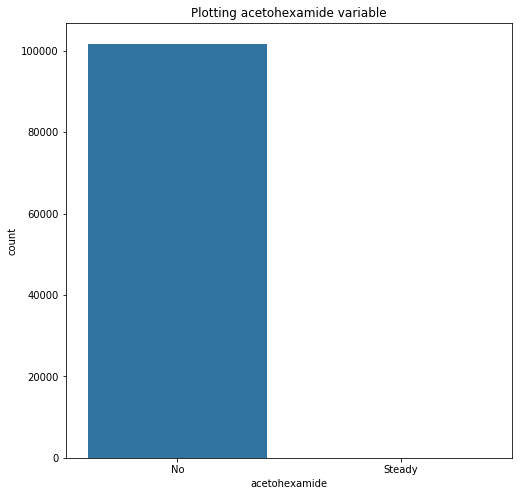

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(x='acetohexamide', data=data)
plt.title('Plotting acetohexamide variable')

Plotting 'acetohexamide' variable using countplot.

# PLOTTING 'glipizide' VARIABLE

Text(0.5,1,'Plotting glipizide variable')

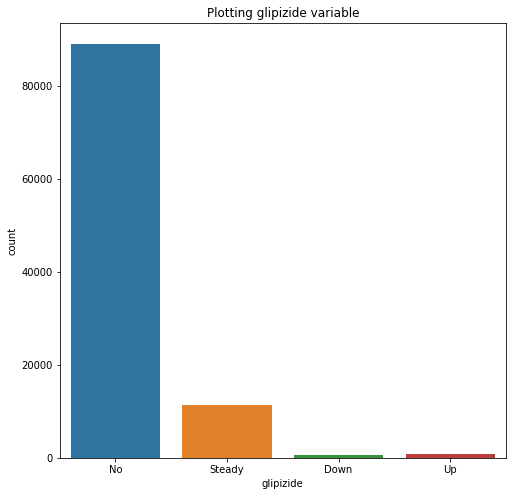

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(x='glipizide', data=data)
plt.title('Plotting glipizide variable')

Plotting 'glipizide' variable using countplot.

# PLOTTING 'glyburide' VARIABLE

Text(0.5,1,'Plotting glyburide variable')

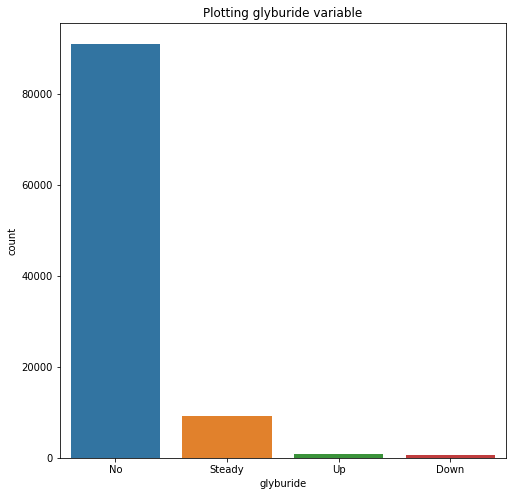

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(x='glyburide', data=data)
plt.title('Plotting glyburide variable')

Plotting 'glyburide' variable using countplot.

# PLOTTING 'tolbutamide' VARIABLE

Text(0.5,1,'Plotting tolbutamide variable')

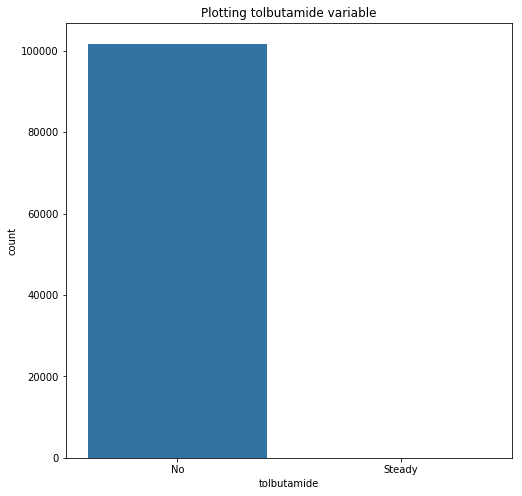

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(x='tolbutamide', data=data)
plt.title('Plotting tolbutamide variable')

Plotting 'tolbutamide' variable using countplot.

# PLOTTING 'pioglitazone' VARIABLE

Text(0.5,1,'Plotting pioglitazone variable')

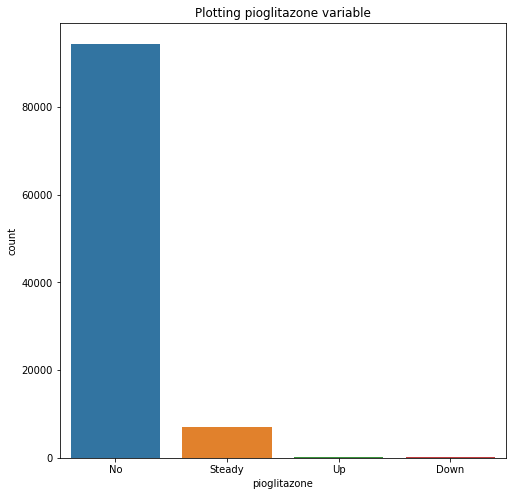

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(x='pioglitazone', data=data)
plt.title('Plotting pioglitazone variable')

Plotting 'pioglitazone' variable using countplot.

# PLOTTING 'rosiglitazone' VARIABLE

Text(0.5,1,'Plotting rosiglitazone variable')

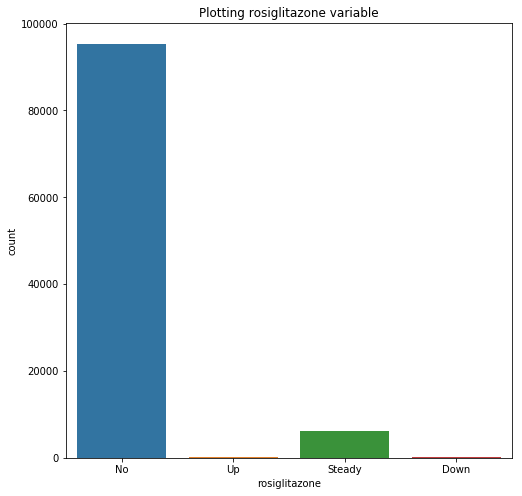

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(x='rosiglitazone', data=data)
plt.title('Plotting rosiglitazone variable')

Plotting 'rosiglitazone' variable using countplot.

# PLOTTING 'acarbose' VARIABLE

Text(0.5,1,'Plotting acarbose variable')

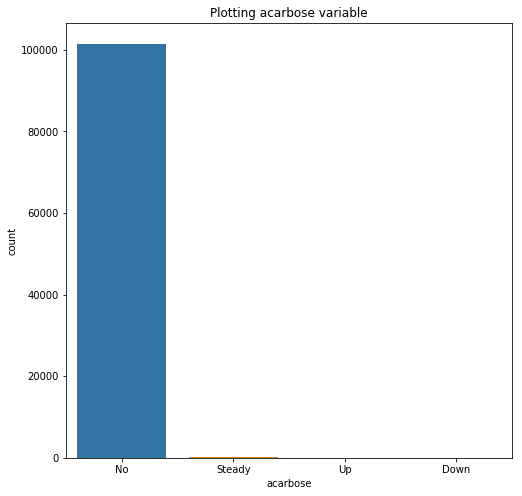

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(x='acarbose', data=data)
plt.title('Plotting acarbose variable')

Plotting 'acarbose' variable using countplot.

# PLOTTING 'miglitol' VARIABLE

Text(0.5,1,'Plottig miglitol variable')

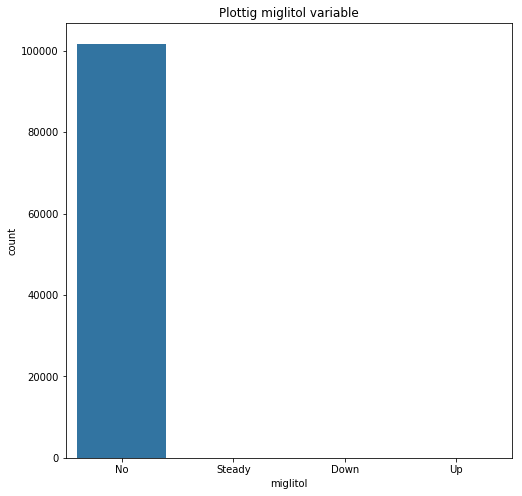

In [39]:
plt.figure(figsize=(8,8))
sns.countplot(x='miglitol',data=data)
plt.title('Plottig miglitol variable')

Plotting 'miglitol' variable using countplot.

# PLOTTING 'troglitazone' VARIABLE

Text(0.5,1,'Plotting troglitazone variable')

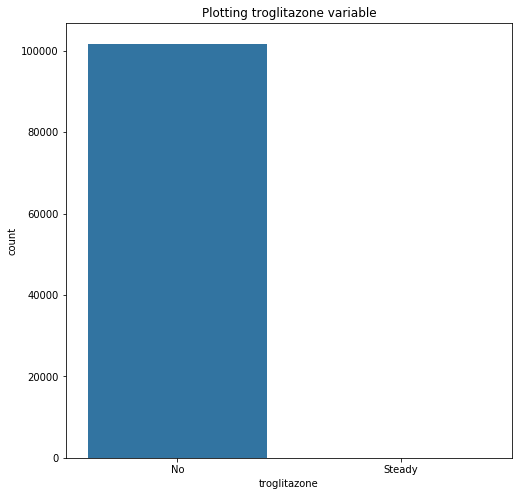

In [40]:
plt.figure(figsize=(8,8))
sns.countplot(x='troglitazone', data=data)
plt.title('Plotting troglitazone variable')

Plotting 'troglitazone' variable using countplot.

# PLOTTING 'tolazamide' VARIABLE

Text(0.5,1,'Plotting tolazamide variable')

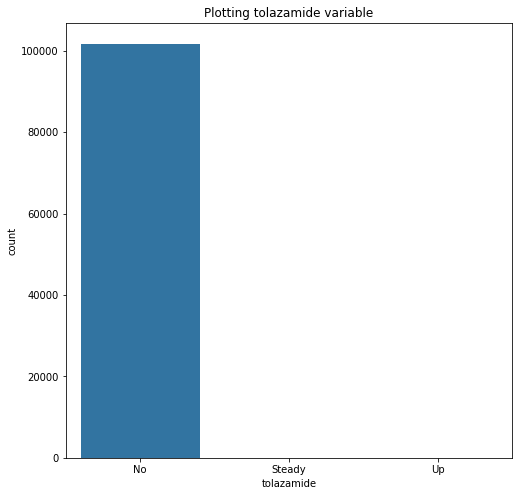

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(x='tolazamide', data=data)
plt.title('Plotting tolazamide variable')

Plotting 'tolazamide' variable using countplot.

# PLOTTING 'examide' VARIABLE

Text(0.5,1,'Plotting examide variable')

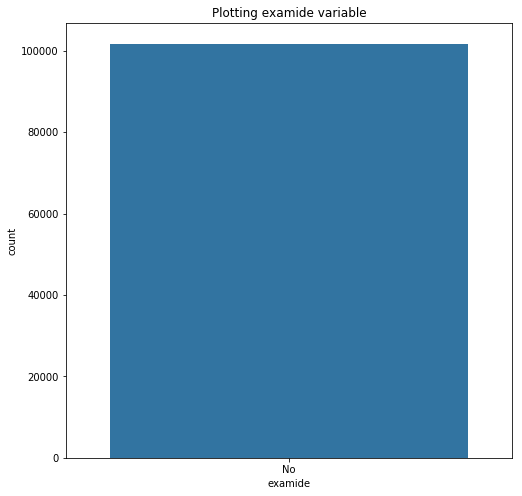

In [42]:
plt.figure(figsize=(8,8))
sns.countplot(x='examide', data=data)
plt.title('Plotting examide variable')

Plotting 'examide' variable using countplot.

# Plotting 'examide' variable using countplot.

Text(0.5,1,'Plotting citoglipton variable')

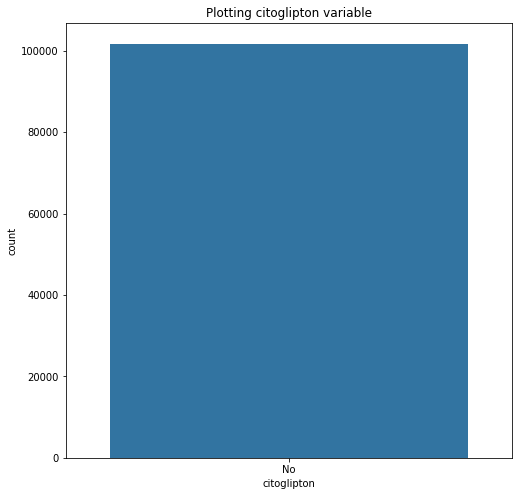

In [43]:
plt.figure(figsize=(8,8))
sns.countplot(x='citoglipton', data=data)
plt.title('Plotting citoglipton variable')

Plotting 'citoglipton' variable using countplot.

# PLOTTING 'insulin' VARIABLE

Text(0.5,1,'Plotting insulin variable')

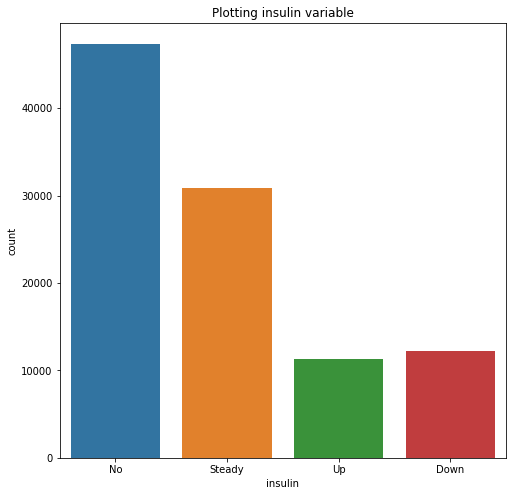

In [44]:
plt.figure(figsize=(8,8))
sns.countplot(x='insulin', data=data)
plt.title('Plotting insulin variable')

Plotting 'insulin' variable using countplot.

# PLOTTING 'glyburide-metformin' VARIABLE

Text(0.5,1,'Plotting glyburide-metformin variable')

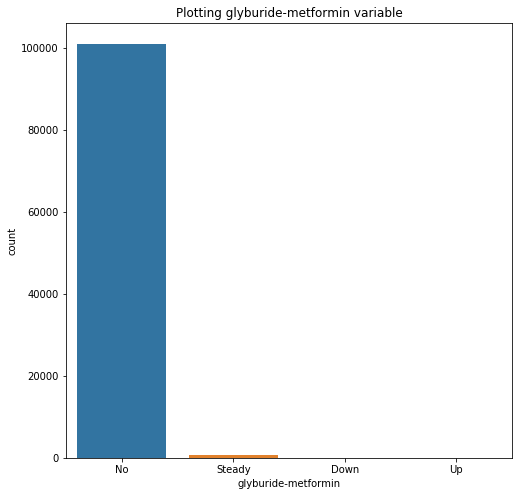

In [45]:
plt.figure(figsize=(8,8))
sns.countplot(x='glyburide-metformin', data=data)
plt.title('Plotting glyburide-metformin variable')

Plotting 'glyburide-metformin' variable using countplot.

# PLOTTING 'glipizide-metformin' VARIABLE

Text(0.5,1,'Plotting glipizide-metformin variable')

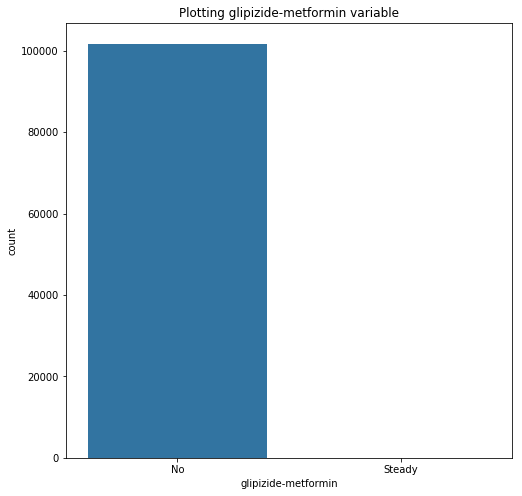

In [46]:
plt.figure(figsize=(8,8))
sns.countplot(x='glipizide-metformin', data=data)
plt.title('Plotting glipizide-metformin variable')

Plotting 'glipizide-metformin' variable using countplot.

# PLOTTING 'glimepiride-pioglitazone' VARIABLE

Text(0.5,1,'Plotting glimepiride-pioglitazone variable')

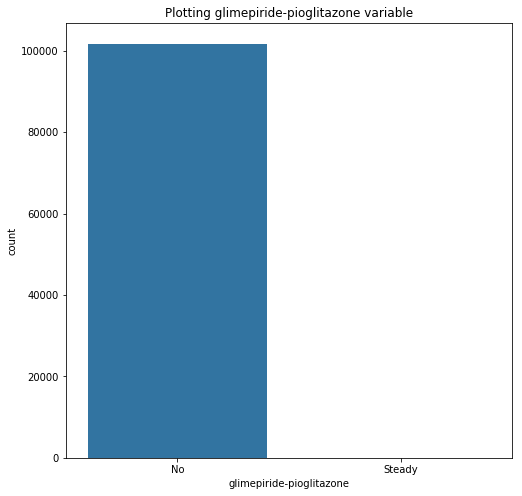

In [47]:
plt.figure(figsize=(8,8))
sns.countplot(x='glimepiride-pioglitazone', data=data)
plt.title('Plotting glimepiride-pioglitazone variable')

Plotting 'glimepiride-pioglitazone' variable using countplot.

# PLOTTING 'metformin-rosiglitazone' VARIABLE

Text(0.5,1,'Plotting metformin-rosiglitazone variable')

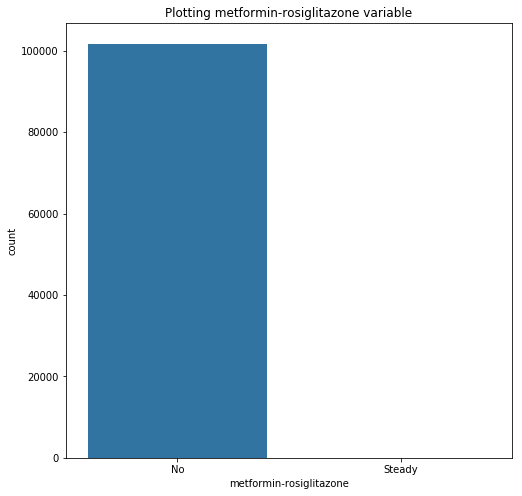

In [48]:
plt.figure(figsize=(8,8))
sns.countplot(x='metformin-rosiglitazone', data=data)
plt.title('Plotting metformin-rosiglitazone variable')

Plotting 'metformin-rosiglitazone' variable using countplot.

# PLOTTING 'metformin-pioglitazone' VARIABLE

Text(0.5,1,'Plotting metformin-pioglitazone variable')

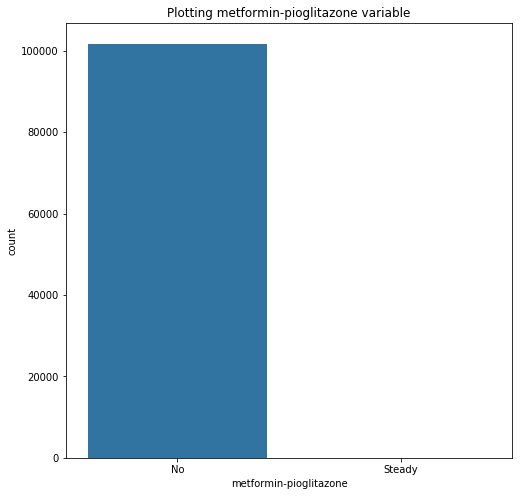

In [49]:
plt.figure(figsize=(8,8))
sns.countplot(x='metformin-pioglitazone', data=data)
plt.title('Plotting metformin-pioglitazone variable')

Plotting 'metformin-pioglitazone' variable using countplot.

# PLOTTING 'change' VARIABLE

Text(0.5,1,'Plotting change variable')

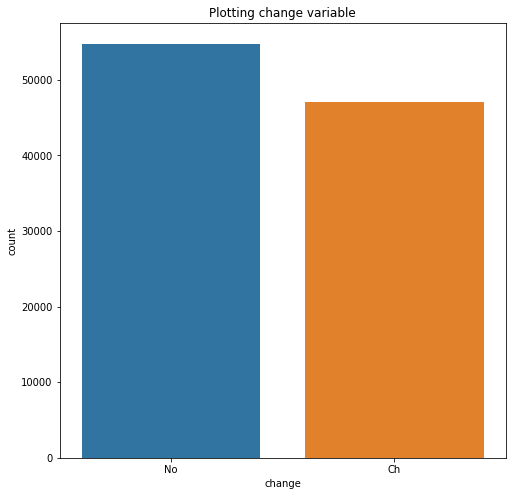

In [50]:
plt.figure(figsize=(8,8))
sns.countplot(x='change', data=data)
plt.title('Plotting change variable')

Plotting 'change' variable using countplot.

# PERFORMING LABEL ENCODING ON THE DATA

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['race']=le.fit_transform(data['race'])
data['gender']=le.fit_transform(data['gender'])
data['max_glu_serum']=le.fit_transform(data['max_glu_serum'])
data['A1Cresult']=le.fit_transform(data['A1Cresult'])
data['metformin']=le.fit_transform(data['metformin'])
data['repaglinide']=le.fit_transform(data['repaglinide'])
data['nateglinide']=le.fit_transform(data['nateglinide'])
data['chlorpropamide']=le.fit_transform(data['chlorpropamide'])
data['glimepiride']=le.fit_transform(data['glimepiride'])
data['acetohexamide']=le.fit_transform(data['acetohexamide'])
data['glipizide']=le.fit_transform(data['glipizide'])
data['glyburide']=le.fit_transform(data['glyburide'])
data['tolbutamide']=le.fit_transform(data['tolbutamide'])
data['pioglitazone']=le.fit_transform(data['pioglitazone'])
data['rosiglitazone']=le.fit_transform(data['rosiglitazone'])
data['acarbose']=le.fit_transform(data['acarbose'])
data['miglitol']=le.fit_transform(data['miglitol'])
data['troglitazone']=le.fit_transform(data['troglitazone'])
data['tolazamide']=le.fit_transform(data['tolazamide'])
data['examide']=le.fit_transform(data['examide'])
data['citoglipton']=le.fit_transform(data['citoglipton'])
data['insulin']=le.fit_transform(data['insulin'])
data['glyburide-metformin']=le.fit_transform(data['glyburide-metformin'])
data['glipizide-metformin']=le.fit_transform(data['glipizide-metformin'])
data['glimepiride-pioglitazone']=le.fit_transform(data['glimepiride-pioglitazone'])
data['metformin-rosiglitazone']=le.fit_transform(data['metformin-rosiglitazone'])
data['metformin-pioglitazone']=le.fit_transform(data['metformin-pioglitazone'])
data['change']=le.fit_transform(data['change'])

Converting the categorical strings of data into numerical values.

# TO SEE WHETHER LABEL ENCODING IS PERFORMED OR NOT

In [52]:
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,2,0,79.0,63.0,6.0,25.0,1.0,41.0,0.0,1.0,...,0,0,0,1,1,0,0,0,0,1
1,2,0,66.0,119.0,6.0,25.0,3.0,34.0,0.0,4.0,...,0,0,0,2,1,0,0,0,0,1
2,2,0,60.0,70.0,6.0,25.0,2.0,45.0,0.0,5.0,...,0,0,0,2,1,0,0,0,0,1
3,2,0,19.0,79.0,6.0,25.0,1.0,54.0,0.0,8.0,...,0,0,0,2,1,0,0,0,0,1
4,2,0,63.0,20.0,6.0,25.0,2.0,11.0,0.0,11.0,...,0,0,0,2,1,0,0,0,0,1


# CHECKING WHETHER THERE ARE NULL VALUES

In [53]:
data.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

# PERFORMING 'MINMAX' SCALING

In [54]:
from sklearn.preprocessing import minmax_scale
data[['gender','age','weight','admission_type_id','discharge_disposition_id']]=minmax_scale(data[['gender','age','weight','admission_type_id','discharge_disposition_id']])
data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','diag_1']]=minmax_scale(data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','diag_1']])
data[['diag_2','diag_3','number_diagnoses','insulin']]=minmax_scale(data[['diag_2','diag_3','number_diagnoses','insulin']])
data[['number_inpatient','number_outpatient','race']]=minmax_scale(data[['number_inpatient','number_outpatient','race']])
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,0.4,0.0,0.766667,0.472222,0.084746,0.888889,0.000000,0.305344,0.0,0.0000,...,0,0,0,0.333333,1,0,0,0,0,1
1,0.4,0.0,0.622222,0.990741,0.084746,0.888889,0.153846,0.251908,0.0,0.0375,...,0,0,0,0.666667,1,0,0,0,0,1
2,0.4,0.0,0.555556,0.537037,0.084746,0.888889,0.076923,0.335878,0.0,0.0500,...,0,0,0,0.666667,1,0,0,0,0,1
3,0.4,0.0,0.100000,0.620370,0.084746,0.888889,0.000000,0.404580,0.0,0.0875,...,0,0,0,0.666667,1,0,0,0,0,1
4,0.4,0.0,0.588889,0.074074,0.084746,0.888889,0.076923,0.076336,0.0,0.1250,...,0,0,0,0.666667,1,0,0,0,0,1


Converting different range of values in between 0 and 1.

# DIVIDING DATA FOR TESTING AND TRAINING

In [55]:
x=data.drop('change', axis=1)
y=data['change']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: change, dtype: int64

Dividing data for Output variable and input variables.

# TRAINING, TESTING, SPLITTING DATA

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=40)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((61060, 42), (40707, 42), (61060,), (40707,))

Training,Testing,Splitting data to train the dataset and test the dataset.

# APPLYING RANDOM FOREST CLASSIFIER MODEL

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc=rfc.predict(x_test)
pred_rfc

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

Fitting the model for testing and training of data.

# FINDING OUT CONFUSION MATRIX

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[18565   179]
 [    0 21963]]


Confusion matrix is a summary of prediction results on a classification problem.

# FINDING OUT CLASSIFICATION REPORT

In [59]:
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     18744
          1       0.99      1.00      1.00     21963

avg / total       1.00      1.00      1.00     40707



The classification report visualizer displays the precision, recall, F1, and support scores for the model.

# APPLYING LOGISTIC REGRESSION MODEL

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
predlr

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

# FINDING OUT CONFUSION MATRIX

In [61]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
print(confusion_matrix(y_test, predlr))

[[12595  6149]
 [ 3869 18094]]


# FINDING OUT CLASSIFICATION REPORT

In [62]:
print(classification_report(y_test, predlr))

             precision    recall  f1-score   support

          0       0.77      0.67      0.72     18744
          1       0.75      0.82      0.78     21963

avg / total       0.75      0.75      0.75     40707



# FINDING ACCURACY SCORE

In [63]:
acc_logreg=round(accuracy_score(predlr, y_test)*100, 2)
print(acc_logreg)

75.39


# APPLYING SUPPORT VECTOR CLASSIFIER MODEL

In [64]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test)
pred_svc

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

# FINDING OUT CONFUSION MATRIX

In [65]:
print(confusion_matrix(y_test, pred_svc))

[[13869  4875]
 [ 1951 20012]]


# FINDING OUT CLASSIFICATION REPORT

In [66]:
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.88      0.74      0.80     18744
          1       0.80      0.91      0.85     21963

avg / total       0.84      0.83      0.83     40707

